# Importing Libraries

In [2]:
# for data manipulation
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for model training and model evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# for Linear regression assumptions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro
from scipy import stats

# Data Gathering

In [3]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\computed_insight_success_of_active_sellers.csv")
df

,merchantid,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount,totalurgencycount,urgencytextrate
0,5357bcf2bb72c5504882e889,2,120000,60000.0,4.219,320031.0,9.00,20.0,54.0,54.0,8836.0,1.0,50.0
1,5708773c3c02161b3f8c7900,5,107100,21420.0,3.934,139223.0,7.76,34.2,61.0,61.0,4010.0,3.0,60.0
2,5417aada4ad3ab27e954b76c,2,100007,50004.0,4.053,108048.0,8.00,8.0,-1.0,-1.0,5531.0,NaN,NaN
3,570f3a713a698c14278bb51e,1,100000,100000.0,3.889,19248.0,5.67,19.0,71.0,71.0,18393.0,1.0,100.0
4,53082ea15aefb07dfe1f2a4f,1,100000,100000.0,4.036,366898.0,5.00,33.0,85.0,85.0,13789.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,567bad8582c35f28103e5813,1,2,2.0,3.999,21307.0,11.00,10.0,-10.0,-10.0,1.0,NaN,NaN
954,5b24edf0d1c360301099e9c6,1,2,2.0,4.303,693.0,16.00,16.0,0.0,0.0,0.0,NaN,NaN
955,5d417e7070327a2743021677,1,1,1.0,3.598,378.0,2.72,9.0,70.0,70.0,0.0,NaN,NaN
956,5add589edb5f1f32114d07df,1,1,1.0,3.956,1134.0,14.00,14.0,0.0,0.0,0.0,NaN,NaN


# Exploratory Data Analysis (EDA)

In [4]:
df.shape

(958, 13)

In [5]:
df.columns

Index(['merchantid', 'listedproducts', 'totalunitssold',
       'meanunitssoldperproduct', 'rating', 'merchantratingscount',
       'meanproductprices', 'meanretailprices', 'averagediscount',
       'meandiscount', 'meanproductratingscount', 'totalurgencycount',
       'urgencytextrate'],
      dtype='object')

In [6]:
df.describe()                                           # Gives you all the statistical information

,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount,totalurgencycount,urgencytextrate
count,958.000000,958.000000,958.000000,958.000000,9.580000e+02,958.000000,958.000000,958.000000,958.000000,958.000000,391.000000,391.000000
mean,1.641962,7124.483299,4407.605428,4.043994,2.202045e+04,8.634906,24.802265,28.721294,28.698017,922.538622,1.209719,65.572890
std,1.246183,14363.521893,9167.077812,0.222137,8.473232e+04,3.987599,30.258719,39.918708,39.914269,1925.750178,0.583542,28.476426
min,1.000000,1.000000,1.000000,2.333000,0.000000e+00,1.000000,1.000000,-18.000000,-18.000000,0.000000,1.000000,14.000000
25%,1.000000,100.000000,100.000000,3.931000,1.373000e+03,6.000000,7.000000,-10.000000,-10.000000,31.000000,1.000000,50.000000
50%,1.000000,1000.000000,1000.000000,4.055500,5.990500e+03,8.000000,11.000000,16.000000,16.000000,210.500000,1.000000,50.000000
75%,2.000000,10000.000000,5000.000000,4.190000,1.723850e+04,11.000000,28.875000,71.000000,71.000000,920.750000,1.000000,100.000000
max,15.000000,120000.000000,100000.000000,5.000000,2.174765e+06,49.000000,252.000000,97.000000,97.000000,20744.000000,6.000000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   merchantid               958 non-null    object 
 1   listedproducts           958 non-null    int64  
 2   totalunitssold           958 non-null    int64  
 3   meanunitssoldperproduct  958 non-null    float64
 4   rating                   958 non-null    float64
 5   merchantratingscount     958 non-null    float64
 6   meanproductprices        958 non-null    float64
 7   meanretailprices         958 non-null    float64
 8   averagediscount          958 non-null    float64
 9   meandiscount             958 non-null    float64
 10  meanproductratingscount  958 non-null    float64
 11  totalurgencycount        391 non-null    float64
 12  urgencytextrate          391 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 97.4+ KB


In [8]:
df.isna().sum()                                        # Finding missing values

merchantid                   0
listedproducts               0
totalunitssold               0
meanunitssoldperproduct      0
rating                       0
merchantratingscount         0
meanproductprices            0
meanretailprices             0
averagediscount              0
meandiscount                 0
meanproductratingscount      0
totalurgencycount          567
urgencytextrate            567
dtype: int64

In [9]:
# checking if the outliers are pressent

<Axes: >

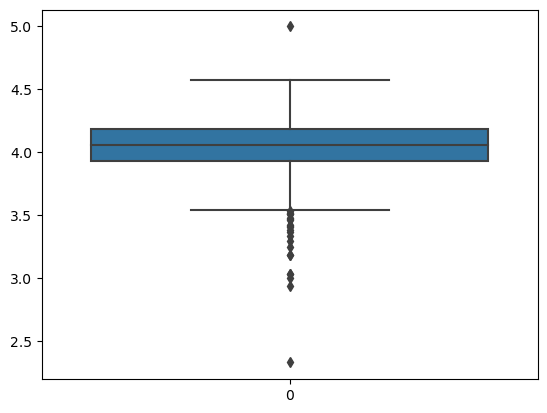

In [10]:
sns.boxplot(df["rating"])

# Feature Engineering

In [11]:
df = df.drop(["totalurgencycount","urgencytextrate","merchantid"],axis=1)                

In [12]:
df

,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount
0,2,120000,60000.0,4.219,320031.0,9.00,20.0,54.0,54.0,8836.0
1,5,107100,21420.0,3.934,139223.0,7.76,34.2,61.0,61.0,4010.0
2,2,100007,50004.0,4.053,108048.0,8.00,8.0,-1.0,-1.0,5531.0
3,1,100000,100000.0,3.889,19248.0,5.67,19.0,71.0,71.0,18393.0
4,1,100000,100000.0,4.036,366898.0,5.00,33.0,85.0,85.0,13789.0
...,...,...,...,...,...,...,...,...,...,...
953,1,2,2.0,3.999,21307.0,11.00,10.0,-10.0,-10.0,1.0
954,1,2,2.0,4.303,693.0,16.00,16.0,0.0,0.0,0.0
955,1,1,1.0,3.598,378.0,2.72,9.0,70.0,70.0,0.0
956,1,1,1.0,3.956,1134.0,14.00,14.0,0.0,0.0,0.0


In [13]:
# removing outliers

In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

LowerTail = Q1-1.5*IQR
UpperTail = Q3+1.5*IQR

In [15]:
show_outliers = (df<LowerTail)|(df>UpperTail)
outlier_count = show_outliers.sum()
outlier_count

listedproducts              75
totalunitssold              61
meanunitssoldperproduct     76
rating                      23
merchantratingscount       105
meanproductprices           16
meanretailprices           106
averagediscount              0
meandiscount                 0
meanproductratingscount    108
dtype: int64

In [16]:
# Remove outliers
df_cleaned = df[~show_outliers.any(axis=1)]                            # Remove rows containing any outliers in any column

In [17]:
df_cleaned

,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount
63,3,22000,7333.0,3.881,3771.0,8.00,7.00,-14.0,-14.00,766.0
68,2,21000,10500.0,4.023,5281.0,9.50,8.50,-12.0,-12.00,1127.0
70,2,21000,10500.0,4.085,15076.0,9.00,13.00,31.0,31.00,670.0
74,3,20200,6733.0,4.002,14482.0,6.15,5.67,1.0,0.67,744.0
75,3,20200,6733.0,4.155,16803.0,10.33,9.00,-15.0,-14.67,1056.0
...,...,...,...,...,...,...,...,...,...,...
953,1,2,2.0,3.999,21307.0,11.00,10.00,-10.0,-10.00,1.0
954,1,2,2.0,4.303,693.0,16.00,16.00,0.0,0.00,0.0
955,1,1,1.0,3.598,378.0,2.72,9.00,70.0,70.00,0.0
956,1,1,1.0,3.956,1134.0,14.00,14.00,0.0,0.00,0.0


# Feature Selection

In [18]:
# linearity 

In [19]:
df_cleaned.corr()

,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,averagediscount,meandiscount,meanproductratingscount
listedproducts,1.000000,0.269463,-0.015248,-0.092255,0.074642,-0.081618,-0.012104,-0.023298,-0.023768,-0.057047
totalunitssold,0.269463,1.000000,0.877153,0.014429,0.181767,-0.026654,-0.037899,-0.068926,-0.069217,0.735026
meanunitssoldperproduct,-0.015248,0.877153,1.000000,0.046216,0.143197,-0.004018,-0.049418,-0.065244,-0.065385,0.863465
rating,-0.092255,0.014429,0.046216,1.000000,0.099392,-0.014749,0.015019,0.037275,0.037391,0.092795
merchantratingscount,0.074642,0.181767,0.143197,0.099392,1.000000,0.043835,0.043758,0.013271,0.012916,0.207857
meanproductprices,-0.081618,-0.026654,-0.004018,-0.014749,0.043835,1.000000,0.220934,-0.196780,-0.196758,0.090944
meanretailprices,-0.012104,-0.037899,-0.049418,0.015019,0.043758,0.220934,1.000000,0.776044,0.776039,-0.013752
averagediscount,-0.023298,-0.068926,-0.065244,0.037275,0.013271,-0.196780,0.776044,1.000000,0.999995,-0.077898
meandiscount,-0.023768,-0.069217,-0.065385,0.037391,0.012916,-0.196758,0.776039,0.999995,1.000000,-0.078000
meanproductratingscount,-0.057047,0.735026,0.863465,0.092795,0.207857,0.090944,-0.013752,-0.077898,-0.078000,1.000000


<Axes: >

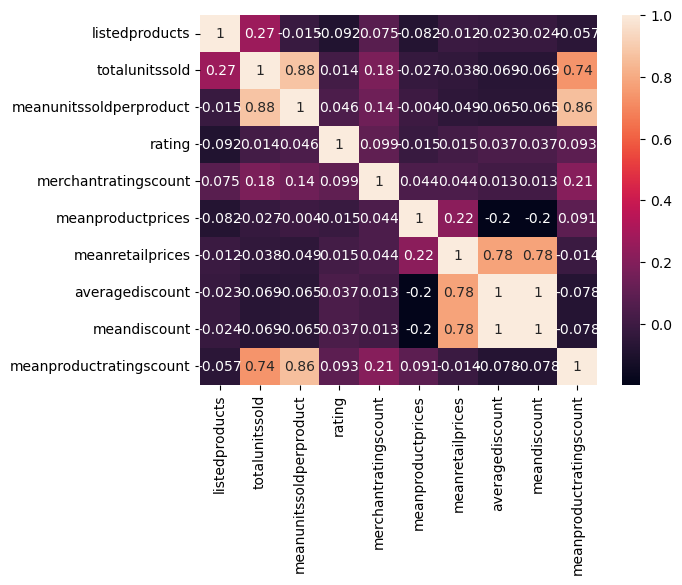

In [20]:
sns.heatmap(df_cleaned.corr(),annot=True)

In [21]:
# no multicolinearity 

In [22]:
df1 = df_cleaned.drop(["totalunitssold"],axis=1)

In [23]:
vif_df = pd.DataFrame()
vif_df["Features"] = df1.columns
vif_df

,Features
0,listedproducts
1,meanunitssoldperproduct
2,rating
3,merchantratingscount
4,meanproductprices
5,meanretailprices
6,averagediscount
7,meandiscount
8,meanproductratingscount


In [24]:
vif_list = []
for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
vif_list

[5.8659209777098145,
 6.020377818399895,
 14.62605134313273,
 1.8015247012325686,
 10.759152331869384,
 9.10316552059601,
 149552.06020812652,
 149514.01625940145,
 6.607531222339043]

In [25]:
vif_df["VIF"] = vif_list
vif_df

,Features,VIF
0,listedproducts,5.865921
1,meanunitssoldperproduct,6.020378
2,rating,14.626051
3,merchantratingscount,1.801525
4,meanproductprices,10.759152
5,meanretailprices,9.103166
6,averagediscount,149552.060208
7,meandiscount,149514.016259
8,meanproductratingscount,6.607531


In [26]:
# remove strongly correleted collumns

In [27]:
df_cleaned = df_cleaned.drop(["averagediscount"],axis=1)
df_cleaned

,listedproducts,totalunitssold,meanunitssoldperproduct,rating,merchantratingscount,meanproductprices,meanretailprices,meandiscount,meanproductratingscount
63,3,22000,7333.0,3.881,3771.0,8.00,7.00,-14.00,766.0
68,2,21000,10500.0,4.023,5281.0,9.50,8.50,-12.00,1127.0
70,2,21000,10500.0,4.085,15076.0,9.00,13.00,31.00,670.0
74,3,20200,6733.0,4.002,14482.0,6.15,5.67,0.67,744.0
75,3,20200,6733.0,4.155,16803.0,10.33,9.00,-14.67,1056.0
...,...,...,...,...,...,...,...,...,...
953,1,2,2.0,3.999,21307.0,11.00,10.00,-10.00,1.0
954,1,2,2.0,4.303,693.0,16.00,16.00,0.00,0.0
955,1,1,1.0,3.598,378.0,2.72,9.00,70.00,0.0
956,1,1,1.0,3.956,1134.0,14.00,14.00,0.00,0.0


# Model Training

In [28]:
x = df_cleaned.drop(["totalunitssold"],axis=1)
y = df_cleaned["totalunitssold"]

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
lin_reg = LinearRegression()

In [31]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [32]:
y_train_pred = lin_reg.predict(x_train)

In [33]:
y_test_pred = lin_reg.predict(x_test)

In [34]:
# normality of residual

In [35]:
residual_train = y_train - y_train_pred

<Axes: xlabel='totalunitssold', ylabel='Density'>

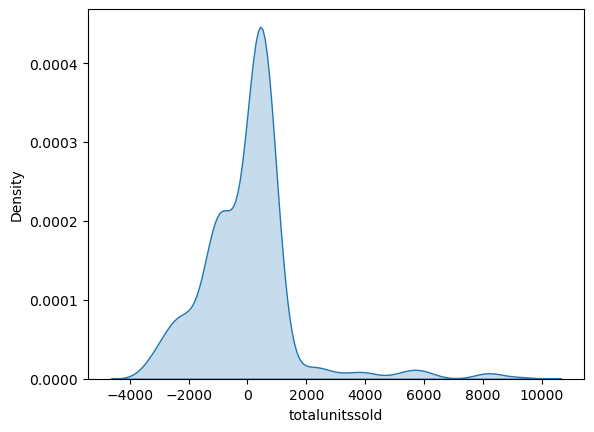

In [36]:
sns.kdeplot(residual_train,fill=True)

In [37]:
# hypothesis testing

In [38]:
p_val, stats = shapiro(residual_train)

if p_val >= 0.05:
    print(p_val)
    print(stats)
    print("Null hypothesis H0 is True")
    print("Data Is normally distributed")
    
else:
    print("Alternative Hypothesis is True")
    print("Data is not normally distributed")

0.793144702911377
1.834291325686558e-24
Null hypothesis H0 is True
Data Is normally distributed


In [39]:
# homoscedasticity

<Axes: ylabel='totalunitssold'>

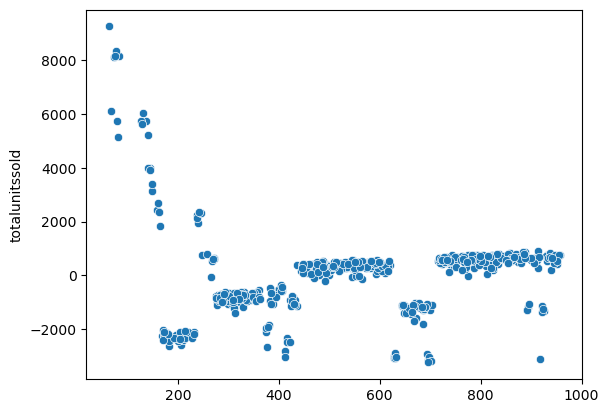

In [40]:
sns.scatterplot(residual_train)

# Model Evaluation

In [41]:
mse = mean_squared_error(y_train,y_train_pred)
print("Mean squared Error for training = ",mse)

mae = mean_absolute_error(y_train,y_train_pred)
print("Mean absolute Error for training = ",mae)

rmse = np.sqrt(mse)
print("Root Mean squared Error for training = ",rmse)

r2score = r2_score(y_train,y_train_pred)
print("R2 score for training = ",r2score)

Mean squared Error for training =  2608823.437877383
Mean absolute Error for training =  1051.0308495444822
Root Mean squared Error for training =  1615.1852642583708
R2 score for training =  0.8554227129493865


In [42]:
mse = mean_squared_error(y_test,y_test_pred)
print("Mean squared Error for testing = ",mse)

mae = mean_absolute_error(y_test,y_test_pred)
print("Mean absolute Error for testing = ",mae)

rmse = np.sqrt(mse)
print("Root Mean squared Error for testing = ",rmse)

r2score = r2_score(y_test,y_test_pred)
print("R2 score for testing = ",r2score)

Mean squared Error for testing =  3274644.708514737
Mean absolute Error for testing =  1123.8270581355453
Root Mean squared Error for testing =  1809.597941122485
R2 score for testing =  0.8370180628305763
